In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

# pour éviter les warnings
from warnings import filterwarnings
filterwarnings('ignore')

# 1- Regression Linéaire avec SKLearn

In [2]:
np.random.seed(0)
m = 100 #creating 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

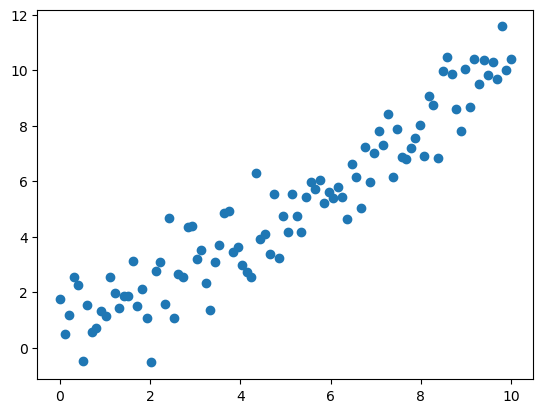

In [3]:
plt.scatter(X, y);

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

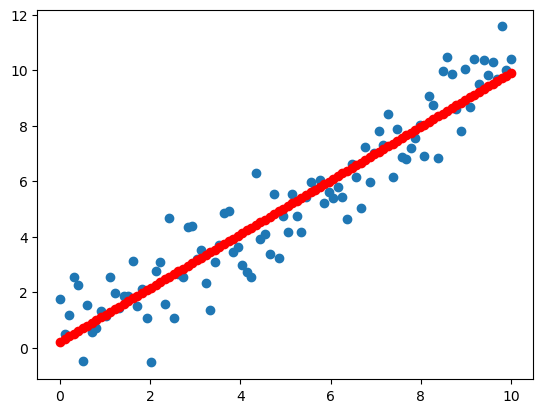

In [5]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, predictions, c = 'r')

# 2- Classification : Survivants du Titanic

In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace  = True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier()

In [11]:
y = titanic['survived']
X = titanic[['pclass', 'sex', 'age']]

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [13]:
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [14]:
model.fit(X, y)
model.score(X, y)

model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [15]:
# Fonction pour voir si on aurait survécu ou non

def survie(model, pclass = 3, sex = 0, age = 24):
    x = np.array([pclass, sex, age]).reshape(1, 3) # reshape pour éviter des erreurs
    print(model.predict(x))
    print(model.predict_proba(x))

In [16]:
survie(model)

[0]
[[0.8 0.2]]


# 3- Train Test Split

In [17]:
from sklearn.datasets import load_iris

(150, 4)


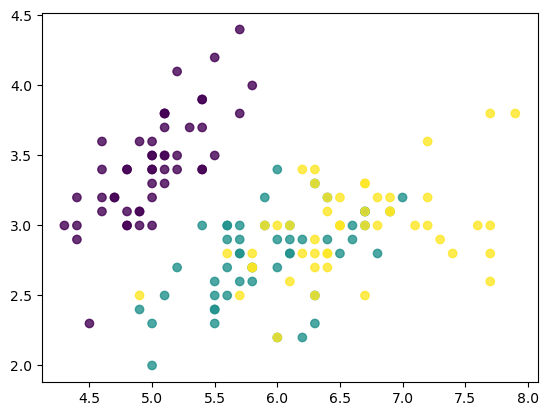

In [18]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.8)

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (120, 4)
Test size:  (30, 4)


Text(0.5, 1.0, 'Test set')

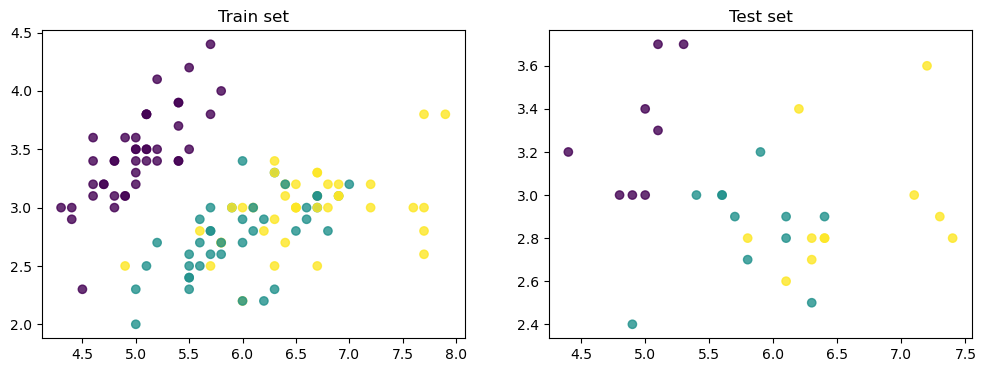

In [24]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, alpha = 0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, alpha = 0.8)
plt.title('Test set')

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)

print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 0.9


# Validation set

# Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 5, scoring = 'accuracy').mean()

0.9833333333333334

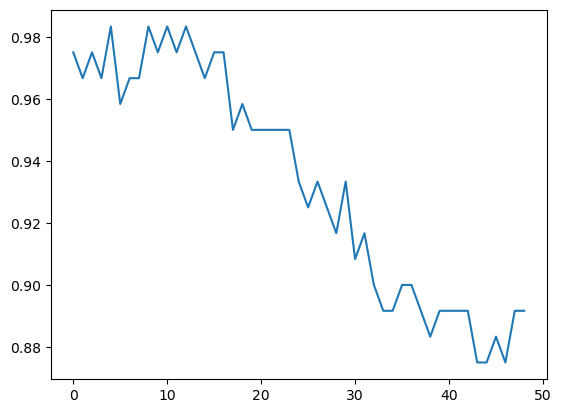

In [31]:
val_score = []

for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 5, scoring = 'accuracy').mean()
    val_score.append(score)
    
plt.plot(val_score);

# Validation curve

In [36]:
from sklearn.model_selection import validation_curve

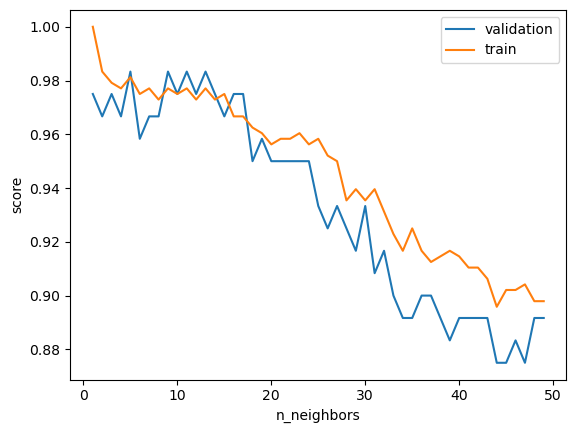

In [54]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name = 'n_neighbors', param_range = k, cv = 5)

plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# Overfitting

# GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {'n_neighbors':np.arange(1, 20), 'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [63]:
grid.best_score_

0.9833333333333334

In [64]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [65]:
model = grid.best_estimator_

In [66]:
model.score(X_test, y_test)

0.9333333333333333

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

# Learning curve

In [70]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


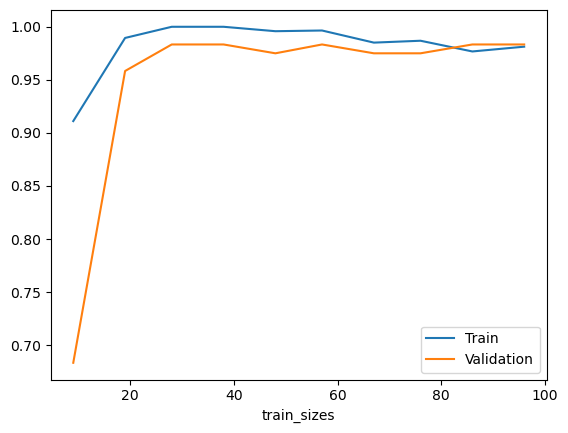

In [72]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'Train')
plt.plot(N, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('train_sizes')
plt.legend()

# Cross-Validation

In [ ]:
KFold (LeaveOneOut), Shuffle Split, 

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold

In [74]:
from sklearn.datasets import load_iris

(150, 4)


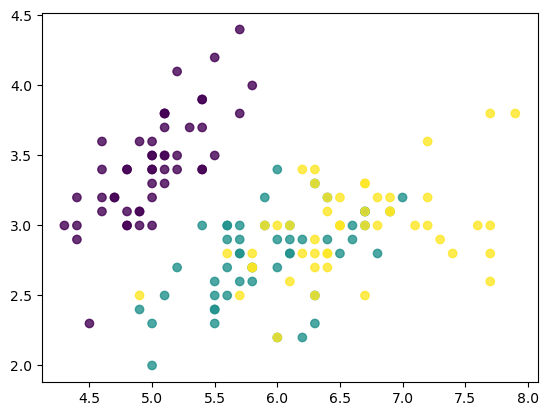

In [75]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.8)

# KFold

In [77]:
cv = KFold(5)

cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

In [79]:
cv = LeaveOneOut()

cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Shuffle Split

In [81]:
cv = ShuffleSplit(4, test_size = 0.2)

cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([0.96666667, 0.93333333, 0.96666667, 0.9       ])

# Stratified KFold

In [83]:
cv = StratifiedKFold(4)

cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

# Group KFold

In [85]:
cv = GroupKFold(5).get_n_splits(X, y, groups = X[:, 0])

cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])